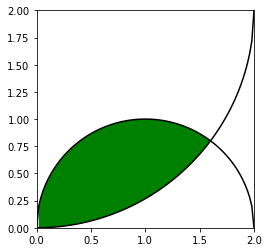

0.9617391537973146  with scypy integration
0.9627168  Monte Carlo integration


In [8]:
# Daniel Schacher   Phys300

import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
import random
from sympy.solvers import solve
from sympy import Symbol
%matplotlib inline


fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')

x1 = np.linspace(0,2,100)
y1 = np.sqrt(1-(x1-1)**2)
ax1.plot(x1,y1,'k')

y2 = 2-np.sqrt(4-x1**2)
ax1.plot(x1,y2,'k')
ax1.set_xlim(0,2)
ax1.set_ylim(0,2)
ax1.fill_between(x1, y1, y2, where=y1>y2, facecolor='green')

plt.show()

# Use sympy library to find the right bound for integration
solvex = Symbol('x')
solvey = solve(((1-(solvex-1)**2)**(1/2) - (2-(4-solvex**2)**(1/2))), solvex)
rbound = float(solvey[1])

# function 1
def f(x):
    return np.sqrt(1-(x-1)**2)

# function 2
def g(x):
    return 2-np.sqrt(4-x**2)

# monte carlo integration
def Monte(N):
    count = 0
    for i in range(N):
        x = (rbound)*random.random()
        y = random.random()
        if y<f(x) and y>g(x):
            count += 1
    I = (rbound)*count/N
    return I

# integration with scipy for compairison 
I1 = integrate.quad(f, 0 ,rbound)
I2 = integrate.quad(g, 0 ,rbound)
print(I1[0] - I2[0], ' with scypy integration')

print(Monte(1000000), ' Monte Carlo integration')